In [33]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import sympy as sp
import numpy as np
from scipy.optimize import fsolve
from sympy.utilities.lambdify import lambdify
sp.init_printing()

In [2]:
x = sp.Symbol('x')
k = sp.Symbol('k', real = True, positive = True)
psi = sp.Function('psi')
x, k, psi

(x, k, psi)

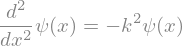

In [7]:
eq = sp.Eq(psi(x).diff(x, x), -k**2*psi(x))
eq

In [16]:
sol = sp.dsolve(eq, psi(x))
sol

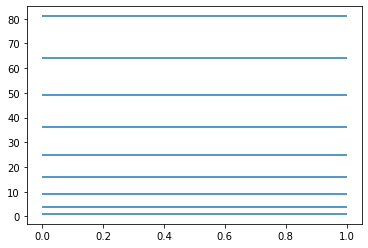

In [10]:
plt.hlines([n**2 for n in range(1, 10)], 0, 1)

$$\int_0^a \sin^2\frac{n \pi}{a}x$$

In [3]:
n = sp.Symbol('n', integer = True, positive = True)
a = sp.Symbol('a', real = True)
x = sp.Symbol('x')
h = sp.Symbol('hbar')
n, a, x, h

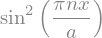

In [13]:
f = sp.sin(n * sp.pi * x / a)**2
f

In [14]:
sp.integrate(f, (x, 0, a))

In [19]:
xxx = np.linspace(0, 1, 10)
xxx

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [20]:
np.sin(xxx)

array([0.        , 0.11088263, 0.22039774, 0.3271947 , 0.42995636,
       0.52741539, 0.6183698 , 0.70169788, 0.77637192, 0.84147098])

In [29]:
def Psi(n, x, t, a = 1.0, h = 1.0, m = 1.0):
    return np.sqrt(2.0 / a) * np.sin(n * np.pi * x / a) * np.exp(-1j * n**2 * np.pi**2 * h / (2 * m * a**2) * t)

In [29]:
xs = np.linspace(0, 1, 100)
fig = plt.figure()
ax = plt.axes(xlim = (0, 1), ylim = (-1.5, 1.5))
line1, = ax.plot([], [], lw = 2)
line2, = ax.plot([], [], lw = 2)
dt = 0.0001
n = 10
plt.close()

#ffmpeg

def animate(i):
    line1.set_data(xs, np.real(Psi(n, xs, dt * i)))
    line2.set_data(xs, np.imag(Psi(n, xs, dt * i)))
    return line1, line2

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())

In [50]:
fig = plt.figure()
ax = plt.axes(xlim = (0, 1), ylim = (0, 2))
line1, = ax.plot([], [], lw = 2)
dt = 0.0001
n = 10
plt.close()

def animate(i):
    line1.set_data(xs, np.abs(Psi(n, xs, dt * i))**2)
    return line1, 

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())

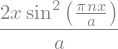

In [33]:
f = x * sp.sin(n * sp.pi * x / a)**2 * 2 / a
f

In [35]:
sp.integrate(f, (x, 0, a)).simplify()

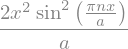

In [36]:
f = x**2 * sp.sin(n * sp.pi * x / a)**2 * 2 / a
f

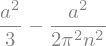

In [39]:
sp.integrate(f, (x, 0, a)).simplify()

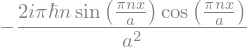

In [45]:
f = -sp.I * h * sp.sin(n * sp.pi * x / a) * 2 / a * sp.sin(n * sp.pi * x / a).diff(x)
f

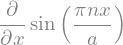

In [44]:
sp.Derivative(sp.sin(n * sp.pi * x / a), x)

In [46]:
sp.integrate(f, (x, 0, a)).simplify()

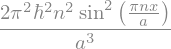

In [47]:
f = -h**2 * sp.sin(n * sp.pi * x / a) * 2 / a * sp.sin(n * sp.pi * x / a).diff(x, x)
f

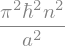

In [48]:
sp.integrate(f, (x, 0, a)).simplify()

$$(\psi_n, \psi_m)=\int_0^a \sqrt{\frac{2}{a}}\sin\frac{n \pi}{a}x\sqrt{\frac{2}{a}}\sin\frac{m \pi}{a}x\ dx$$

In [4]:
m = sp.Symbol('m', integer = True, positive = True)

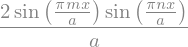

In [5]:
f = sp.sin(n * sp.pi * x / a) * 2 / a * sp.sin(m * sp.pi * x / a)
f

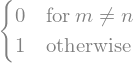

In [6]:
sp.integrate(f, (x, 0, a))

In [11]:
def fun(x, y, z):
    print(x, y, z)

In [9]:
l = [1, 2, 3]

In [12]:
fun(l[0], l[1], l[2])

1 2 3


In [13]:
fun(*l)

1 2 3


In [28]:
# {1:1, 2:1, 3:2}
def PsiSum(x, t, cn):
    ys = np.zeros_like(x, dtype = np.complex128)
    norm = np.sqrt(np.sum(np.abs(np.array([*cn.values()]))**2))
    for k, v in cn.items():
        ys += v * Psi(k, x, t) / norm
    return ys

In [45]:
xs = np.linspace(0, 1, 100)
fig = plt.figure()
ax = plt.axes(xlim = (0, 1), ylim = (0, 6))
line1, = ax.plot([], [], lw = 2)
dt = 0.001
plt.close()

def animate(i):
    line1.set_data(xs, np.abs(PsiSum(xs, dt * i, {2:1, 4:1}))**2)
    return line1, 

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())

# RS9

In [4]:
A = sp.Symbol('A')
Psi0 = A * x * (a - x)
Psi0

$$\int_0^a |Ax(a-x)|^2\ dx = 1$$

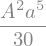

In [5]:
sp.integrate(Psi0**2, (x, 0, a))

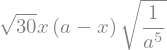

In [8]:
Psi0 = Psi0.subs(A, sp.sqrt(30 / a**5))
Psi0

$$c_n = (\psi_n, \Psi)=\int_0^a \psi_n^*\Psi\ dx$$

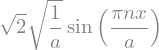

In [10]:
psin = sp.sin(n * sp.pi * x / a) * sp.sqrt(2 / a)
psin

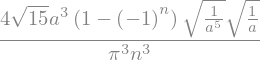

In [13]:
cn = sp.integrate(psin * Psi0, (x, 0, a)).simplify()
cn

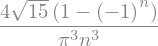

In [15]:
cn = cn.subs(a, 1)
cn

In [22]:
cnf = lambdify(n, cn)
cnf(np.arange(1, 10))

array([0.99927725, 0.        , 0.03701027, 0.        , 0.00799422,
       0.        , 0.00291334, 0.        , 0.00137075])

Text(0, 0.5, '$c_n$')

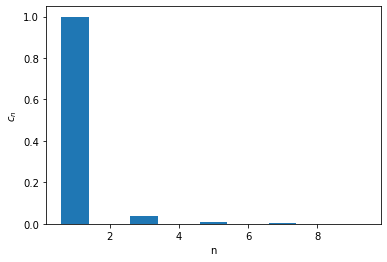

In [23]:
ns = np.arange(1, 10)
plt.bar(ns, cnf(ns))
plt.xlabel('n')
plt.ylabel('$c_n$')

Text(0, 0.5, '$p(E_n)$')

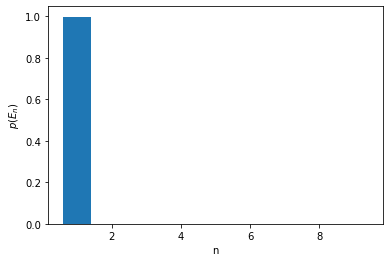

In [24]:
ns = np.arange(1, 10)
plt.bar(ns, cnf(ns)**2)
plt.xlabel('n')
plt.ylabel('$p(E_n)$')

In [30]:
x = []
for i in range(10):
    x.append(i * i)
x

In [31]:
x = [i * i for i in range(10)]
x

In [32]:
x = {i : i**2 for i in range(10)}
x

In [36]:
cns = {n : cnf(n) for n in range(1, 2)}
cns

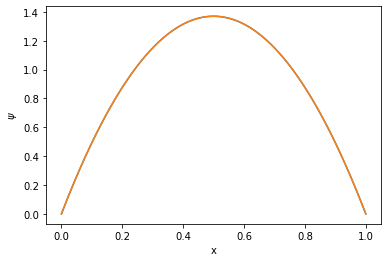

In [42]:
xs = np.linspace(0, 1, 1000)
plt.plot(xs, np.sqrt(30) * xs * (1 - xs))
plt.xlabel('x')
plt.ylabel('$\psi$')
cns = {n : cnf(n) for n in range(1, 60)}
plt.plot(xs, PsiSum(xs, 0, cns).real)

In [44]:
xs = np.linspace(0, 1, 100)
fig = plt.figure()
ax = plt.axes(xlim = (0, 1), ylim = (0, 3))
line1, = ax.plot([], [], lw = 2)
dt = 0.001
plt.close()

def animate(i):
    line1.set_data(xs, np.abs(PsiSum(xs, dt * i, cns))**2)
    return line1, 

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())

# Skończona studnia

$$ k_1 = k_2 \tan k_2 a$$
$$ k_1 = -k_2 \cot k_2 a$$

$$ k_1 - k_2 \tan k_2 a = 0$$
$$ k_1 + k_2 \cot k_2 a = 0$$

In [3]:
def k1(E, V0, m = 1, h = 1):
    return np.sqrt(-2 * m * E) / h
def k2(E, V0, m = 1, h = 1):
    return np.sqrt(2 * m * (E + V0)) / h

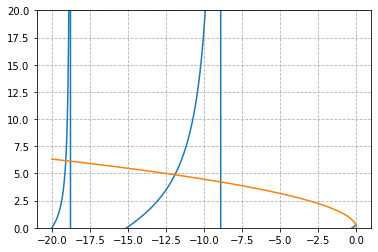

In [56]:
a = 1
V0 = 20
Es = np.linspace(-V0, 0, 1000)
plt.plot(Es, k2(Es, V0) * np.tan(k2(Es, V0) * a))
plt.ylim(0, 20)
plt.grid(ls = '--')
plt.plot(Es, k1(Es, V0))

<ipython-input-68-ce0bd79c119d>:10: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Es, -k2(Es, V0) * 1 / np.tan(k2(Es, V0) * a))


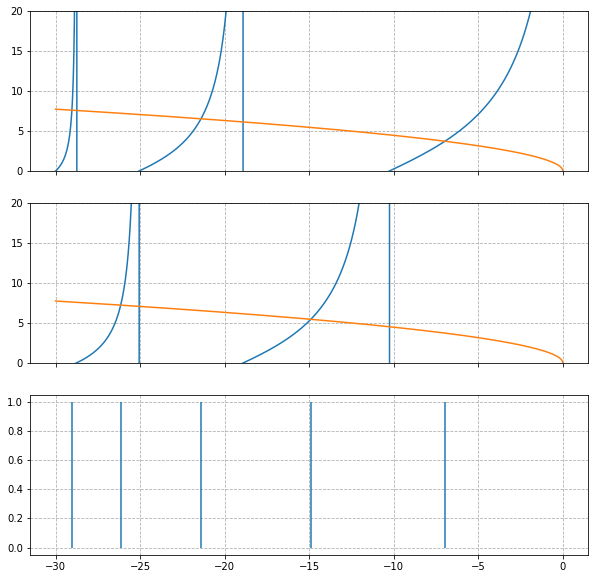

In [68]:
a = 1
V0 = 30
Es = np.linspace(-V0, 0, 1000)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex = True, figsize = (10, 10))
ax1.plot(Es, k2(Es, V0) * np.tan(k2(Es, V0) * a))
ax1.set_ylim(0, 20)
ax1.grid(ls = '--')
ax1.plot(Es, k1(Es, V0))

ax2.plot(Es, -k2(Es, V0) * 1 / np.tan(k2(Es, V0) * a))
ax2.set_ylim(0, 20)
ax2.grid(ls = '--')
ax2.plot(Es, k1(Es, V0))

ax3.grid(ls = '--')
ax3.vlines(E0, 0, 1)
ax3.vlines(E1, 0, 1)
ax3.vlines(E2, 0, 1)
ax3.vlines(E3, 0, 1)
ax3.vlines(E4, 0, 1)

In [42]:
E0, = fsolve(lambda E: k1(E, V0) - k2(E, V0) * np.tan(k2(E, V0) * a), -29)
E0

In [52]:
E1, = fsolve(lambda E: k1(E, V0) + k2(E, V0) * 1 / np.tan(k2(E, V0) * a), -27)
E1

In [48]:
E2, = fsolve(lambda E: k1(E, V0) - k2(E, V0) * np.tan(k2(E, V0) * a), -25)
E2

In [54]:
E3, = fsolve(lambda E: k1(E, V0) + k2(E, V0) * 1 / np.tan(k2(E, V0) * a), -15)
E3

In [50]:
E4, = fsolve(lambda E: k1(E, V0) - k2(E, V0) * np.tan(k2(E, V0) * a), -7)
E4

In [37]:
f = lambda x, y: x**2 + y
f(5, 2)

In [60]:
def psip(x, E, A = 1):
    return np.piecewise(x, [x < -a, x > a], [lambda x: A * np.exp(k1(E, V0) * x), lambda x: A * np.exp(-k1(E, V0) * x), lambda x: A * np.exp(-k1(E, V0) * a) * np.cos(k2(E, V0) * x) / np.cos(k2(E, V0) * a)])

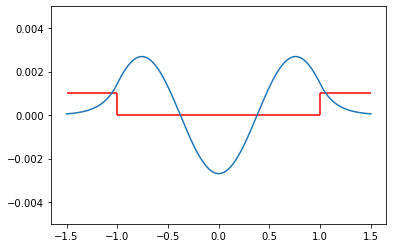

In [83]:
xs = np.linspace(-1.5, 1.5, 1000)
plt.plot(xs, (psip(xs, E2)))
plt.ylim(-0.005, 0.005)
plt.hlines(0.001, -1.5, -1, color = 'r')
plt.hlines(0.001, 1, 1.5, color = 'r')
plt.vlines(-1, 0, 0.001, color = 'r')
plt.vlines(1, 0, 0.001, color = 'r')
plt.hlines(0, -1, 1, color = 'r')